In [401]:
# Bibliotecas arroz com feijão

import pandas as pd
import numpy as np
import seaborn as sns

In [402]:
df = pd.read_csv('train.csv')

In [403]:
# Observando as colunas
pd.set_option('max_columns', 167)
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

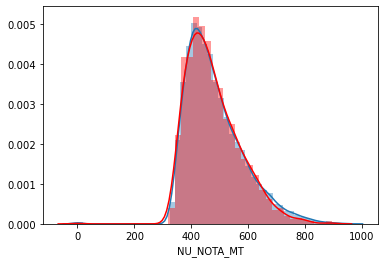

In [404]:
# Será que a nota em cada matéria tem a ver com ser treineiro ou não? Vejamos:
sns.distplot(df['NU_NOTA_MT'][df['IN_TREINEIRO']==0])
sns.distplot(df['NU_NOTA_MT'][df['IN_TREINEIRO']==1],color='red')

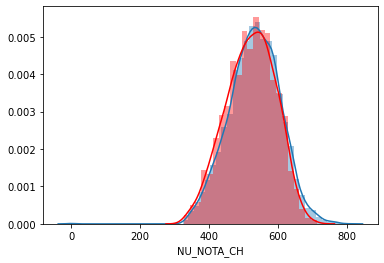

In [405]:
sns.distplot(df['NU_NOTA_CH'][df['IN_TREINEIRO']==0])
sns.distplot(df['NU_NOTA_CH'][df['IN_TREINEIRO']==1],color='red')

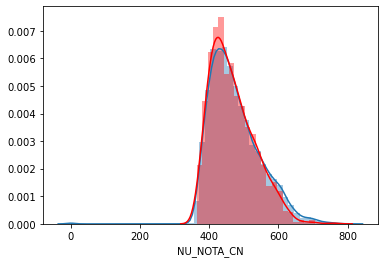

In [406]:
sns.distplot(df['NU_NOTA_CN'][df['IN_TREINEIRO']==0])
sns.distplot(df['NU_NOTA_CN'][df['IN_TREINEIRO']==1],color='red')

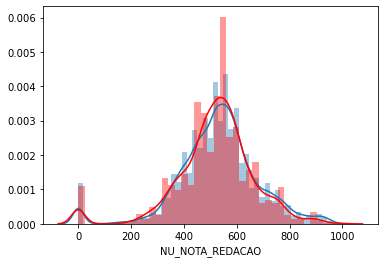

In [407]:
sns.distplot(df['NU_NOTA_REDACAO'][df['IN_TREINEIRO']==0])
sns.distplot(df['NU_NOTA_REDACAO'][df['IN_TREINEIRO']==1],color='red')

In [408]:
# Visualmente não há nada que garanta que as notas tenham relação com ser treineiro ou não

In [343]:
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [344]:
df['IN_TREINEIRO'] # coluna alvo

0        0
1        0
2        0
3        0
4        0
        ..
13725    0
13726    0
13727    1
13728    0
13729    0
Name: IN_TREINEIRO, Length: 13730, dtype: int64

In [409]:
# Verificando o balancemento:

df['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [410]:
# Data set desbalanceado, vamos usar técnicas para melhorar isso.

In [411]:
df.shape

(13730, 167)

In [446]:
# Vamos fazer um fill para aquelas linhas não preenchidas
df_fill = df.fillna(0)

In [447]:
# Dropando colunas não importantes
df_drop = df_fill.drop(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA'],axis = 1)


In [414]:
# Observando as 5 váriaveis mais impactantes para o modelo
df_drop.corr()['IN_TREINEIRO'].nlargest(6).index

Index(['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT'],
      dtype='object')

In [415]:
# Empiricamente sabemos que a IDADE pode ser uma váriavel que influencia, então podemos fazer dois modelos e compara-los:
# Modelo 1: Com as 5 váriaveis mais relacionadas + idade
# Modelo 2: Apenas as 5 váriaveis mais relacionadas

In [416]:
# Modelo 1
# Separando em X e y
X1 = df_drop[['NU_IDADE','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]

y1 = df_drop['IN_TREINEIRO']

In [417]:
from imblearn.over_sampling import SMOTE


# resampling a classe minoritaria
sm = SMOTE(sampling_strategy='auto')
X_res1, y_res1 = sm.fit_sample(X1, y1)

In [418]:
# Balanceado!
y_res1.value_counts()

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

In [419]:
X_res1.shape, y_res1.shape

((23894, 6), (23894,))

In [420]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()

In [421]:
rfc1.fit(X_res1, y_res1)

rfc1.score(X_res1, y_res1)

0.9914622917887336

In [422]:
# Modelo 2
# Separando em X e y
X2 = df_drop[['TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]

y2 = df_drop['IN_TREINEIRO']

In [423]:
from imblearn.over_sampling import SMOTE

# resampling a classe minoritaria
sm = SMOTE(sampling_strategy='auto')
X_res2, y_res2 = sm.fit_sample(X2, y2)

In [424]:
# Balanceado!
y_res2.value_counts()

1    11947
0    11947
Name: IN_TREINEIRO, dtype: int64

In [425]:
X_res2.shape, y_res2.shape

((23894, 5), (23894,))

In [426]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier()

In [427]:
rfc2.fit(X_res2, y_res2)

rfc2.score(X_res2, y_res2)

0.9781116598309199

In [428]:
confusion_matrix(y_res2, rfc2.predict(X_res2))

array([[11424,   523],
       [    0, 11947]], dtype=int64)

In [429]:
print(classification_report(y_res2, rfc2.predict(X_res2)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11947
           1       0.96      1.00      0.98     11947

    accuracy                           0.98     23894
   macro avg       0.98      0.98      0.98     23894
weighted avg       0.98      0.98      0.98     23894



In [430]:
confusion_matrix(y_res1, rfc1.predict(X_res))

array([[11744,   203],
       [    1, 11946]], dtype=int64)

In [431]:
print(classification_report(y_res, rfc1.predict(X_res)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11947
           1       0.98      1.00      0.99     11947

    accuracy                           0.99     23894
   macro avg       0.99      0.99      0.99     23894
weighted avg       0.99      0.99      0.99     23894



In [432]:
# Testando um terceiro modelo só com as 2 váriaveis principais:

# Modelo 3
# Separando em X e y
X3 = df_drop[['NU_IDADE','TP_ST_CONCLUSAO']]

y3 = df_drop['IN_TREINEIRO']

sm = SMOTE(sampling_strategy='auto')
X_res3, y_res3 = sm.fit_sample(X3, y3)

rfc3 = RandomForestClassifier()
rfc3.fit(X_res3, y_res3)
rfc3.score(X_res3, y_res3)

0.9913785887670545

In [433]:
confusion_matrix(y_res3, rfc3.predict(X_res3))

array([[11741,   206],
       [    0, 11947]], dtype=int64)

In [435]:
print(classification_report(y_res, rfc3.predict(X_res3)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11947
           1       0.98      1.00      0.99     11947

    accuracy                           0.99     23894
   macro avg       0.99      0.99      0.99     23894
weighted avg       0.99      0.99      0.99     23894



In [585]:
# Modelo 1 se saiu melhor na acurácia e teve um balanceamento melhor de FP e FN, 
# nossa hipotese em utilizar idade se mostrou real
# Prosseguiremos com este modelo

df_test_original = pd.read_csv('test.csv')
df_test_original

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,31,MG,17,F,2,1,2,0,3,1.0,4.0,0,0,0,0,0,0,0,0,1,1,1,1,425.9,569.7,501.4,1,1.0,140.0,120.0,120.0,120.0,120.0,620.0,B,E,D,B,B,A,NaN,D
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,35,SP,20,F,1,1,1,2,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,483.0,432.9,457.0,1,1.0,100.0,60.0,60.0,80.0,20.0,320.0,A,B,B,A,A,C,NaN,B
4567,3f1c3388244df8d6521e983a809292d9f3bca643,11,RO,22,F,3,1,1,5,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,471.4,570.3,563.8,1,1.0,120.0,120.0,100.0,100.0,60.0,500.0,D,E,E,B,A,B,E,A
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,35,SP,19,M,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,492.9,586.1,559.3,0,1.0,120.0,100.0,100.0,120.0,80.0,520.0,H,D,B,B,B,A,NaN,A


In [437]:
X_test = df_test[['NU_IDADE','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]

In [438]:
ypred = rfc1.predict(X_test)

In [439]:
df_test['IN_TREINEIRO'] = ypred

In [456]:
df_test[['NU_INSCRICAO','IN_TREINEIRO']].to_csv('answer.csv')

In [586]:
df_corr = list(np.abs(df_drop.corr()['IN_TREINEIRO']).nlargest(3).index)

y = df_drop[df_corr].pop('IN_TREINEIRO')
X = df_drop[df_corr].drop('IN_TREINEIRO', axis=1)

In [587]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

X_ohe =  ohe.fit_transform(X)

In [588]:
colunas = X.columns

In [589]:
rfc_dummies = RandomForestClassifier()
rfc_dummies.fit(X_ohe,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [590]:
rfc_dummies.score(X_ohe,y)

0.9970138383102695

In [576]:
df_test = pd.read_csv('test.csv')

In [591]:
df_test = df_test[colunas]

In [592]:
X_test = ohe.transform(df_test)

In [593]:
df_test_original['IN_TREINEIRO'] = rfc_dummies.predict(X_test)

In [595]:
df_test_original[['NU_INSCRICAO','IN_TREINEIRO']].to_csv('answer.csv')

In [604]:
print(classification_report(y, rfc_dummies.predict(X_ohe),target_names=['Treineiro','Não Treineiro']))

               precision    recall  f1-score   support

    Treineiro       1.00      1.00      1.00     11947
Não Treineiro       1.00      0.98      0.99      1783

     accuracy                           1.00     13730
    macro avg       1.00      0.99      0.99     13730
 weighted avg       1.00      1.00      1.00     13730



In [605]:
confusion_matrix(y, rfc_dummies.predict(X_ohe))

array([[11947,     0],
       [   41,  1742]], dtype=int64)